In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('../')

In [3]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

# The Data

In [4]:
data = pd.read_excel('./data/data.xlsx')
data = data.drop(columns=['S/N'])
data.head()

,cDen,Pot,Sn %,pH,C2H4,CO,H2,EtoH,FORM
0,150,3.5,100,14.05,0,23,12,0,61
1,150,3.3,80,14.05,0,23,7,0,66
2,150,3.2,50,14.05,0,34,5,3,52
3,150,3.1,10,14.05,1,42,5,2,42
4,150,3.0,5,14.05,4,48,5,10,19


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cDen,35.0,269.171429,119.205824,141.00,150.00,250.00,350.00,450.00
Pot,35.0,3.860000,0.500118,2.80,3.55,4.00,4.15,4.70
Sn %,35.0,35.428571,38.820314,0.00,3.00,10.00,80.00,100.00
pH,35.0,12.844000,2.447214,8.02,14.05,14.05,14.05,14.05
C2H4,35.0,7.971429,10.348304,0.00,0.00,4.00,9.50,37.00
CO,35.0,21.942857,12.311981,5.00,12.50,19.00,27.50,50.00
H2,35.0,13.742857,9.344211,5.00,7.00,10.00,15.50,37.00
EtoH,35.0,10.600000,13.211403,0.00,0.00,6.00,14.00,48.00
FORM,35.0,35.371429,21.706716,7.00,14.00,38.00,54.00,70.00


In [6]:
features_col = list(data.columns[:4])
target_col = list(data.columns[4:])
#target_col = [target_col[0], target_col[2]]
print('Features: ', features_col)
print('Target: ', target_col)

Features:  ['cDen', 'Pot', 'Sn %', 'pH']
Target:  ['C2H4', 'CO', 'H2', 'EtoH', 'FORM']


In [7]:
# normalize the data in target columns by 100
data[target_col] = data[target_col] / 100
data.head(2)

,cDen,Pot,Sn %,pH,C2H4,CO,H2,EtoH,FORM
0,150,3.5,100,14.05,0.0,0.23,0.12,0.0,0.61
1,150,3.3,80,14.05,0.0,0.23,0.07,0.0,0.66


In [8]:
data[features_col[2]] = data[features_col[2]] / 100
data.head(2)

,cDen,Pot,Sn %,pH,C2H4,CO,H2,EtoH,FORM
0,150,3.5,1.0,14.05,0.0,0.23,0.12,0.0,0.61
1,150,3.3,0.8,14.05,0.0,0.23,0.07,0.0,0.66


In [10]:
# create a pymatgen structure from the data. remember that it's CuSn with Sn fraction in position 2 in features_col
import pymatgen.core as pmg

def create_structure(Sn_percent):
    # create the structure
    if Sn_percent <= 1:
        base = f'Cu{1-Sn_percent}Sn{Sn_percent}'
        comp = pmg.Composition(base)
    else:
        raise ValueError('Sn percent must be less than or equal to 1')
    return comp.weight

data['weight'] = data['Sn %'].apply(create_structure).apply(lambda x: x)
data.head(5)

,cDen,Pot,Sn %,pH,C2H4,CO,H2,EtoH,FORM,weight
0,150,3.5,1.00,14.05,0.00,0.23,0.12,0.00,0.61,118.7100
1,150,3.3,0.80,14.05,0.00,0.23,0.07,0.00,0.66,107.6772
2,150,3.2,0.50,14.05,0.00,0.34,0.05,0.03,0.52,91.1280
3,150,3.1,0.10,14.05,0.01,0.42,0.05,0.02,0.42,69.0624
4,150,3.0,0.05,14.05,0.04,0.48,0.05,0.10,0.19,66.3042


In [ ]:
data['Cu %'] = 1 - data['Sn %']
data.head(2)

,cDen,Pot,Sn %,pH,C2H4,CO,H2,EtoH,FORM,weight,Cu %
0,150,3.5,1.0,14.05,0.0,0.23,0.12,0.0,0.61,118.7100,0.0
1,150,3.3,0.8,14.05,0.0,0.23,0.07,0.0,0.66,107.6772,0.2


In [ ]:
features_col += ['weight', 'Cu %']

In [ ]:
# reassign the features and target columns
data = data[features_col + target_col]
data.head(2)

,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,150,3.5,1.0,14.05,118.7100,0.0,0.0,0.23,0.12,0.0,0.61
1,150,3.3,0.8,14.05,107.6772,0.2,0.0,0.23,0.07,0.0,0.66


In [ ]:
len(features_col)

6

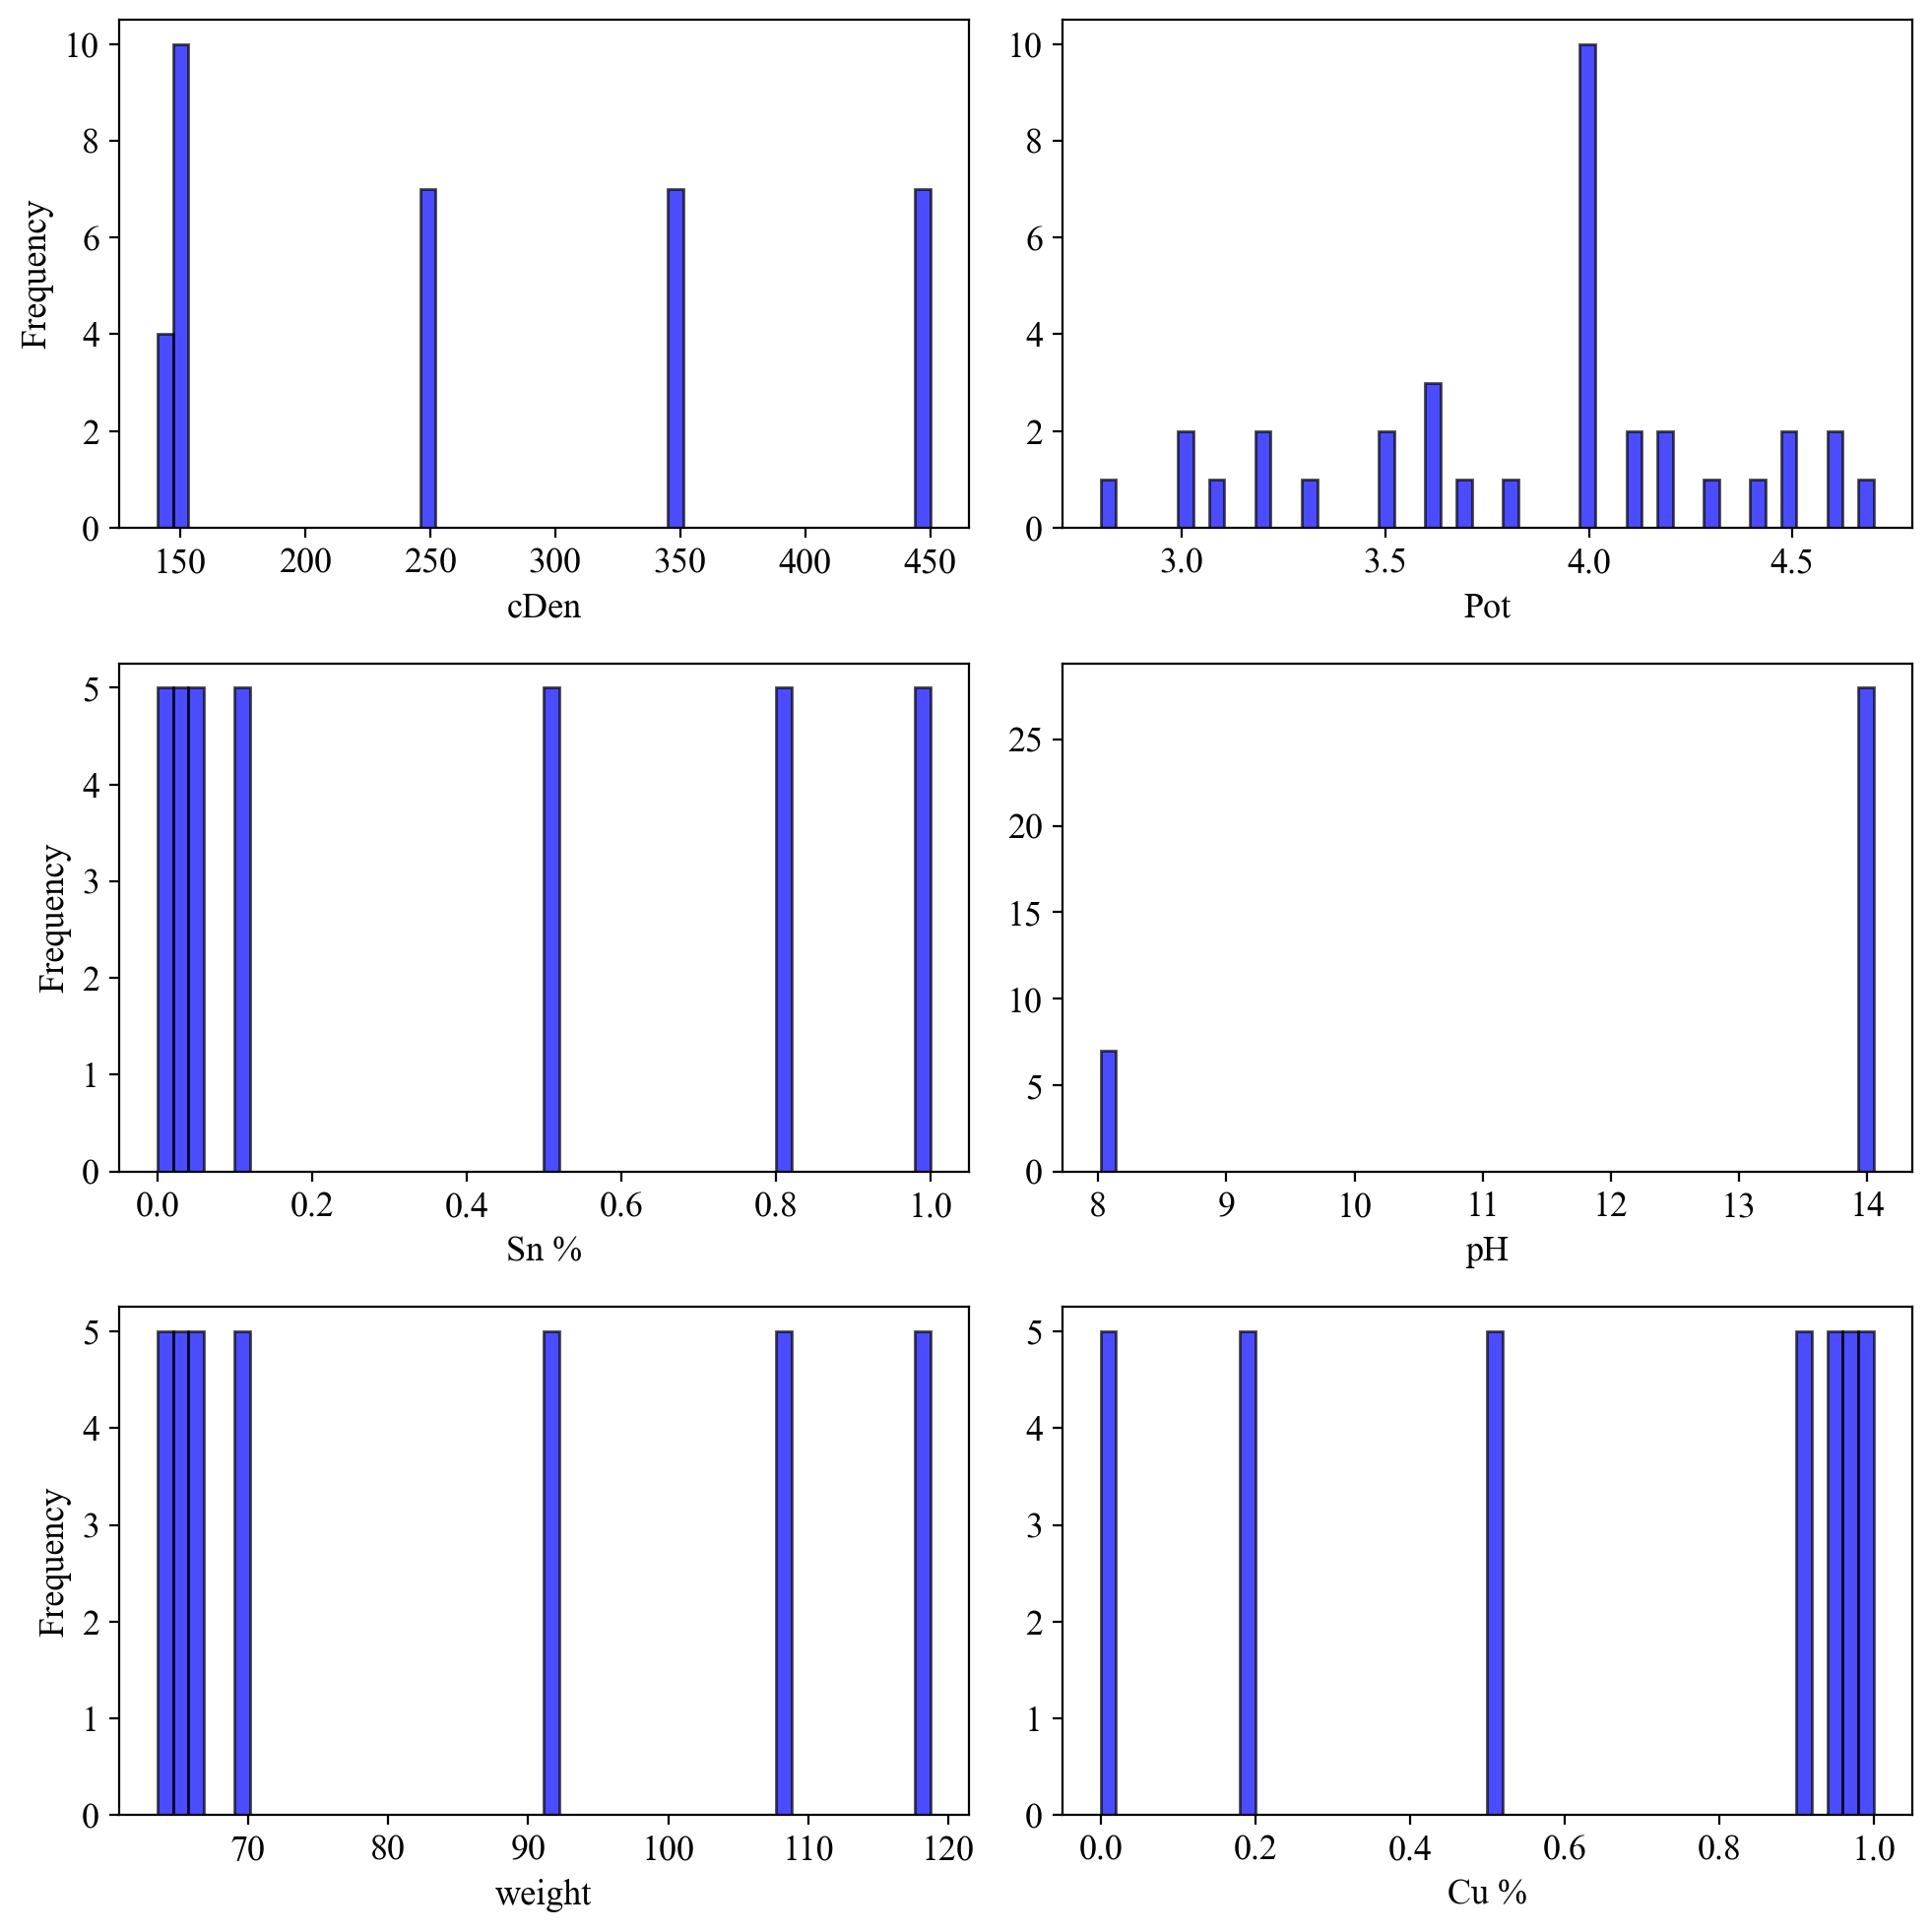

In [ ]:
# show histogram for all features with subplots
plt.figure(figsize=(10, 10), dpi=200)
for i, feature in enumerate(features_col):
    plt.subplot(3, 2, i+1)
    k = plt.hist(data[feature], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel(feature)
    
    if i%2 == 0:
        plt.ylabel('Frequency')
plt.tight_layout()

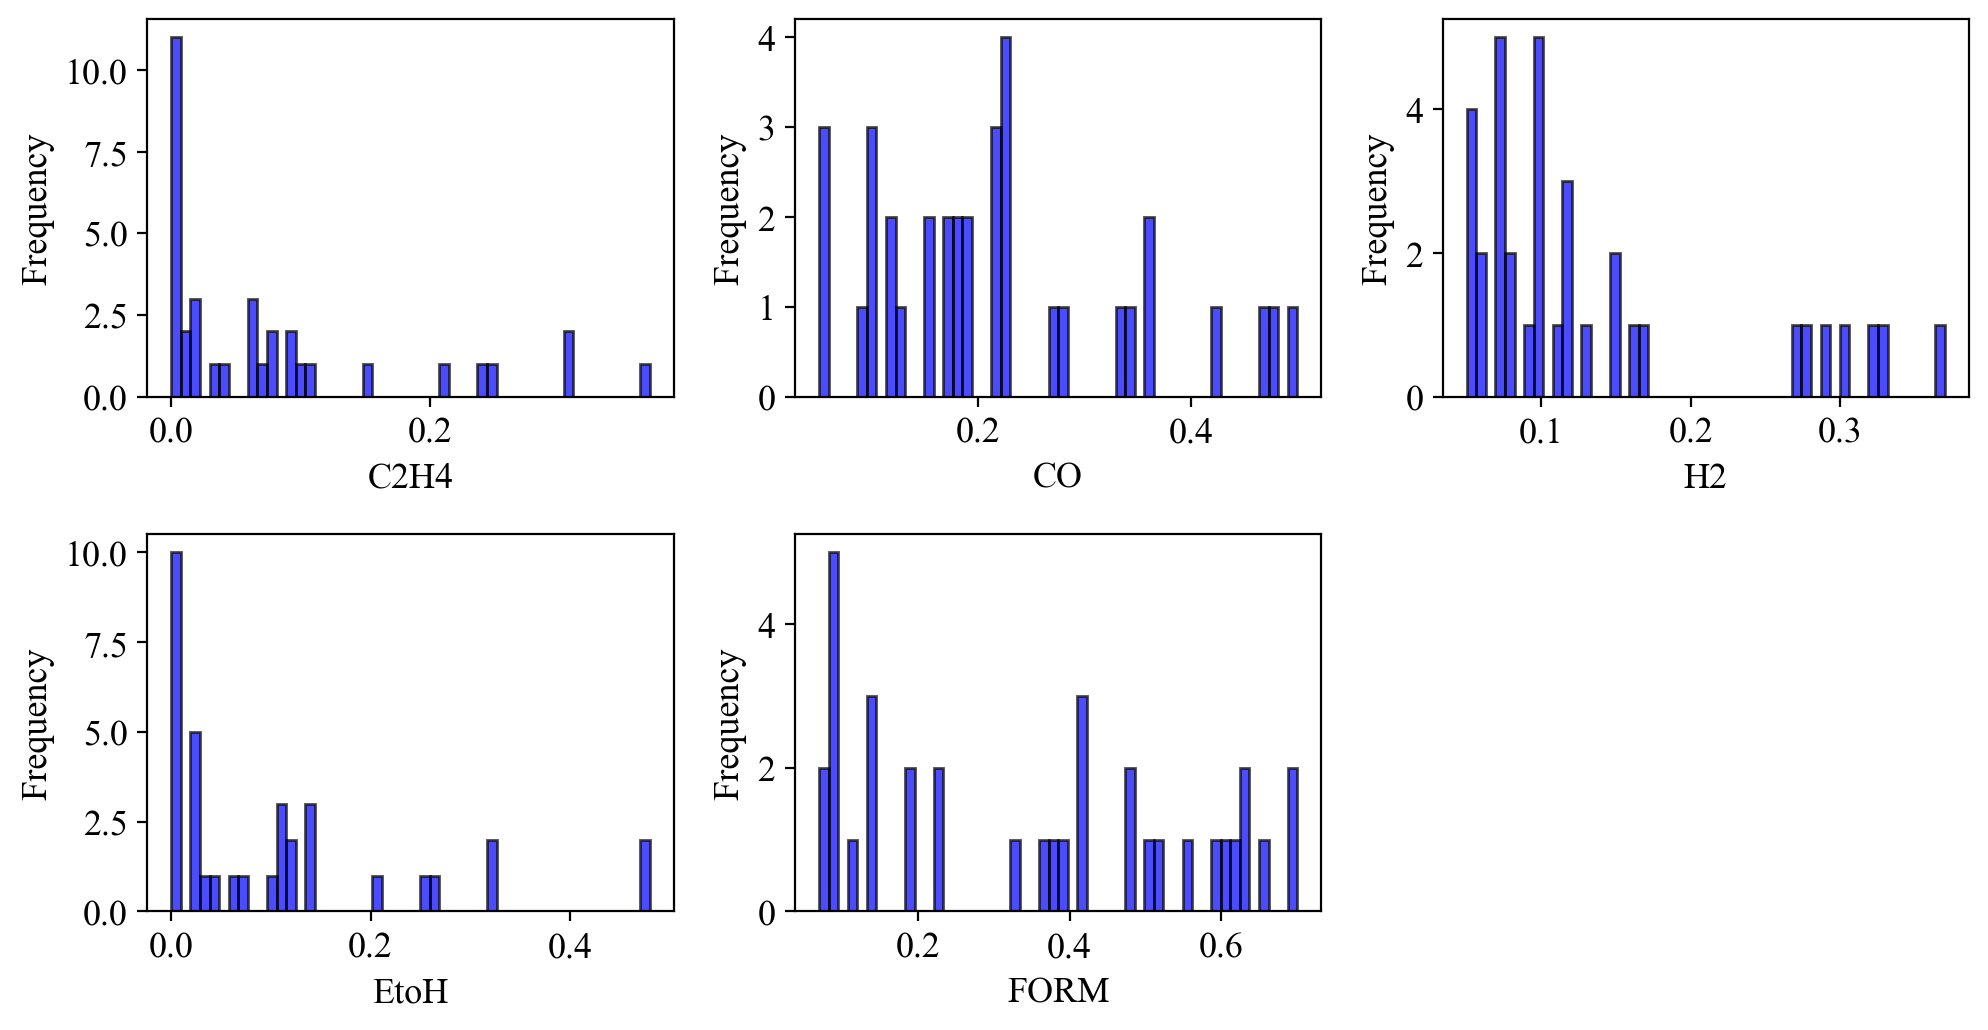

In [ ]:
# show histogram for all features with subplots
plt.figure(figsize=(10, 10), dpi=200)
for i, feature in enumerate(target_col):
    plt.subplot(4, 3, i+1)
    k = plt.hist(data[feature], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()

In [ ]:
from src.utils import plot_heat_map

In [ ]:
!pwd

/Users/gbemidebe/Documents/GitHub/monsur


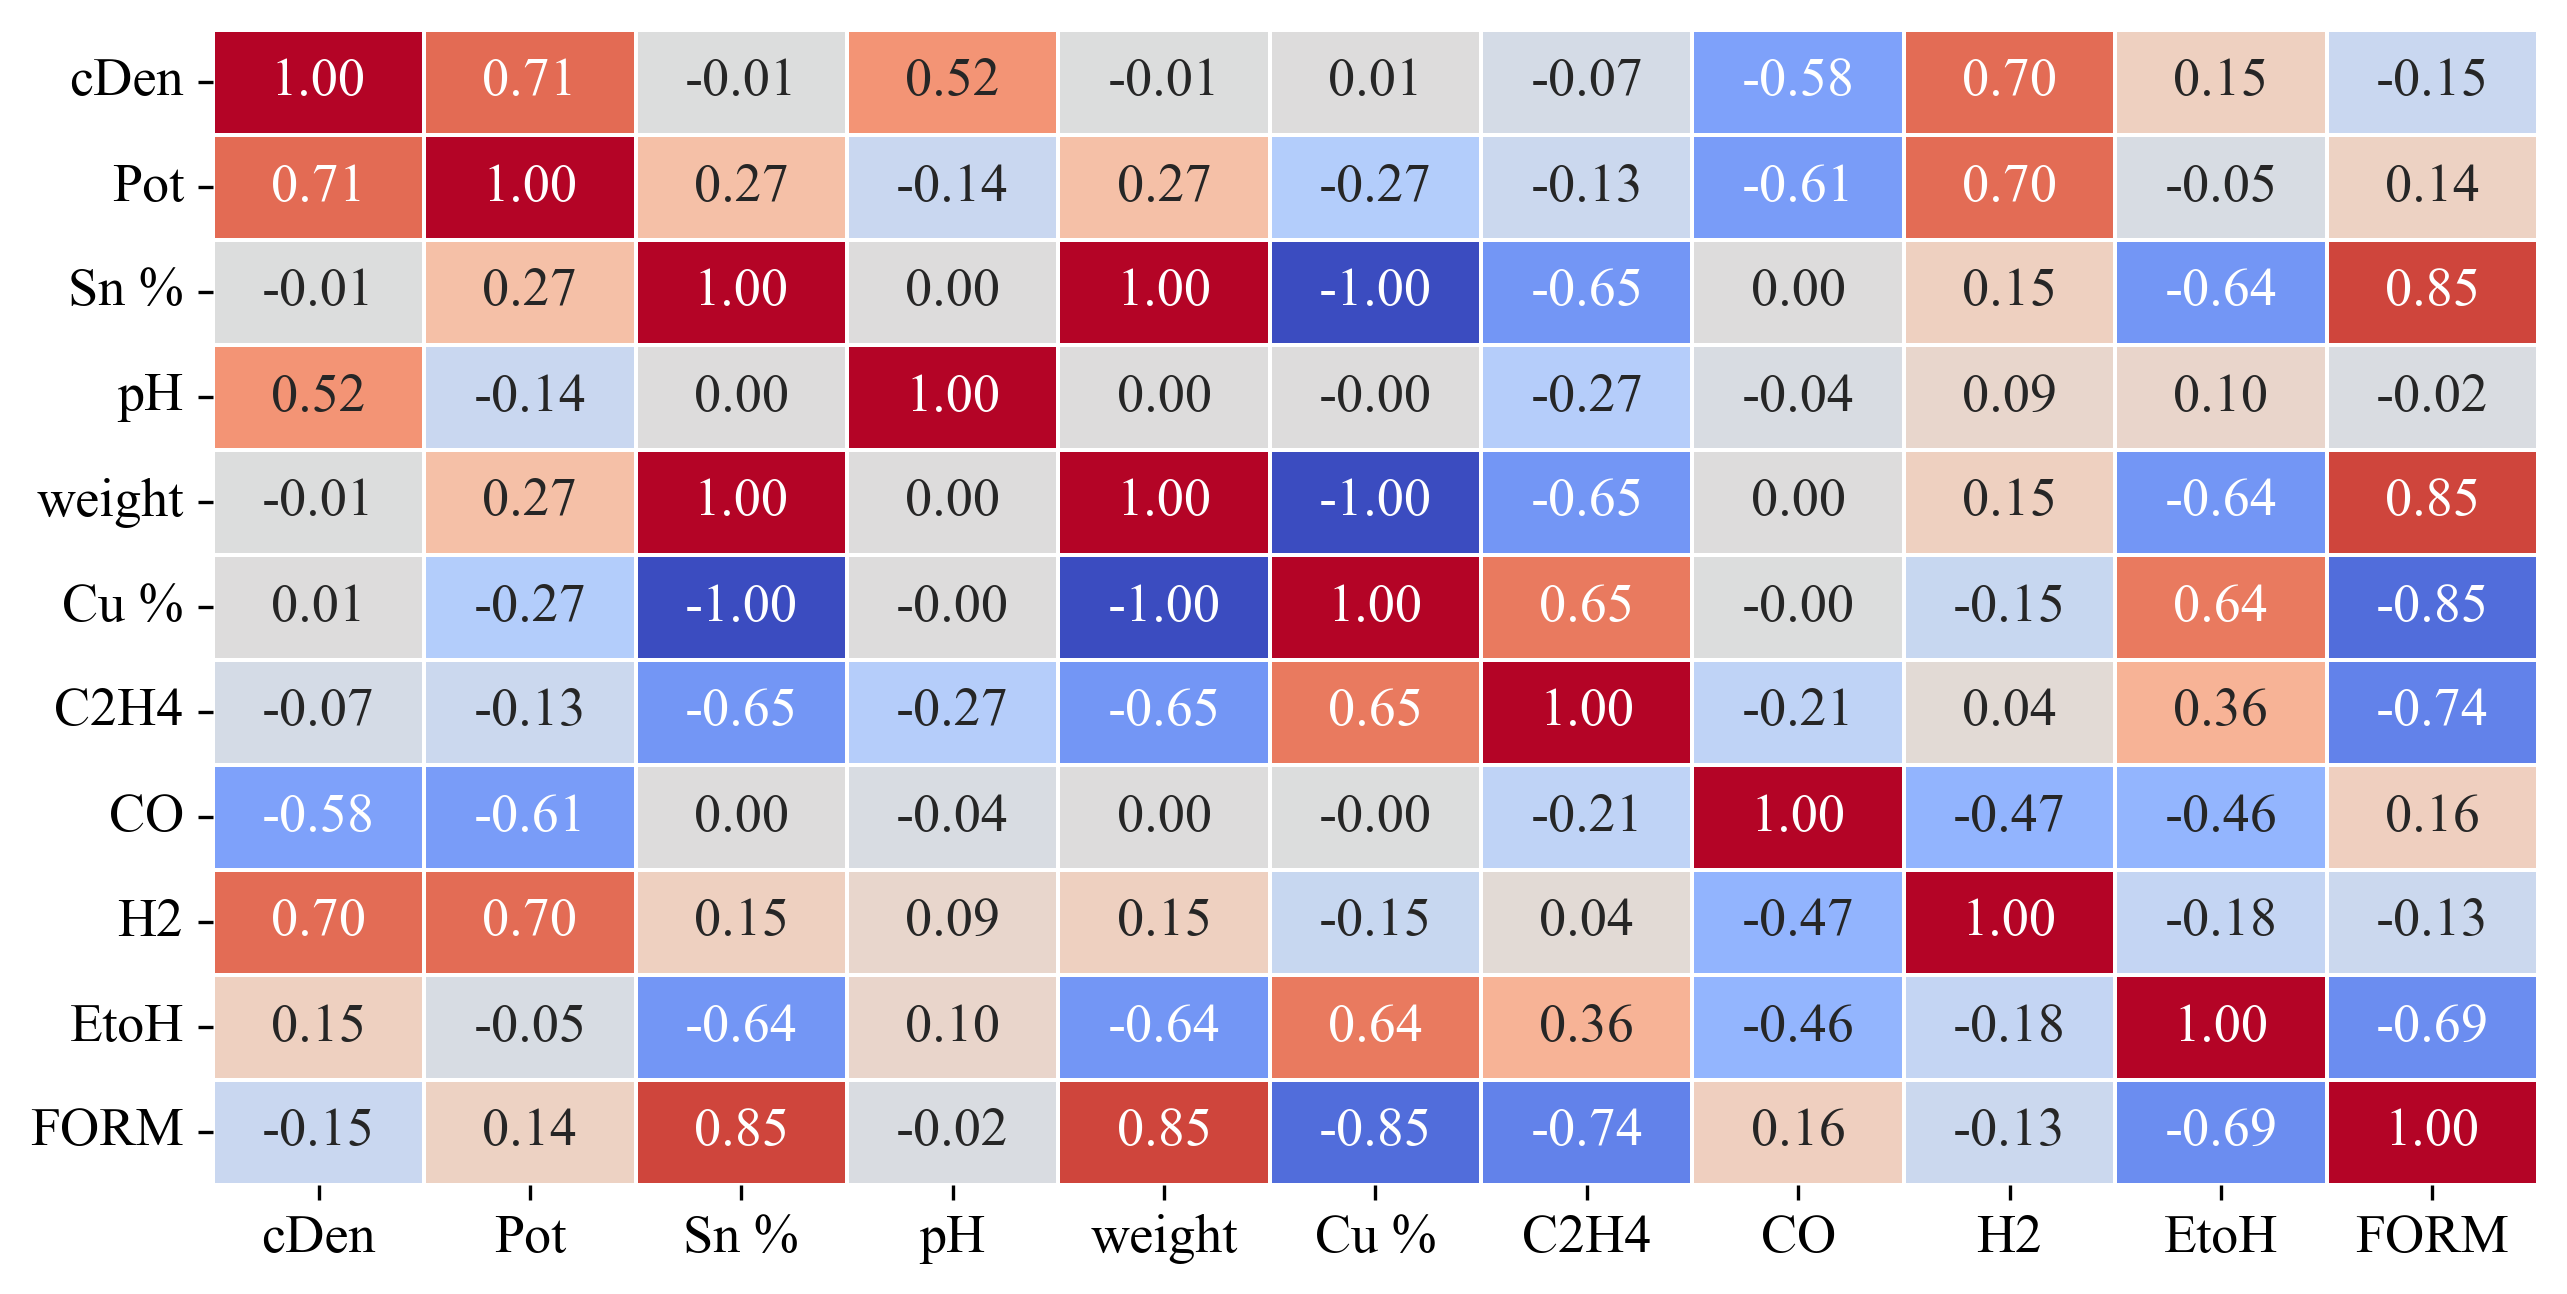

In [ ]:
plot_heat_map(data = data, fig_size = (10, 5), mask=False, save_fig=True, name='general_no_mask')

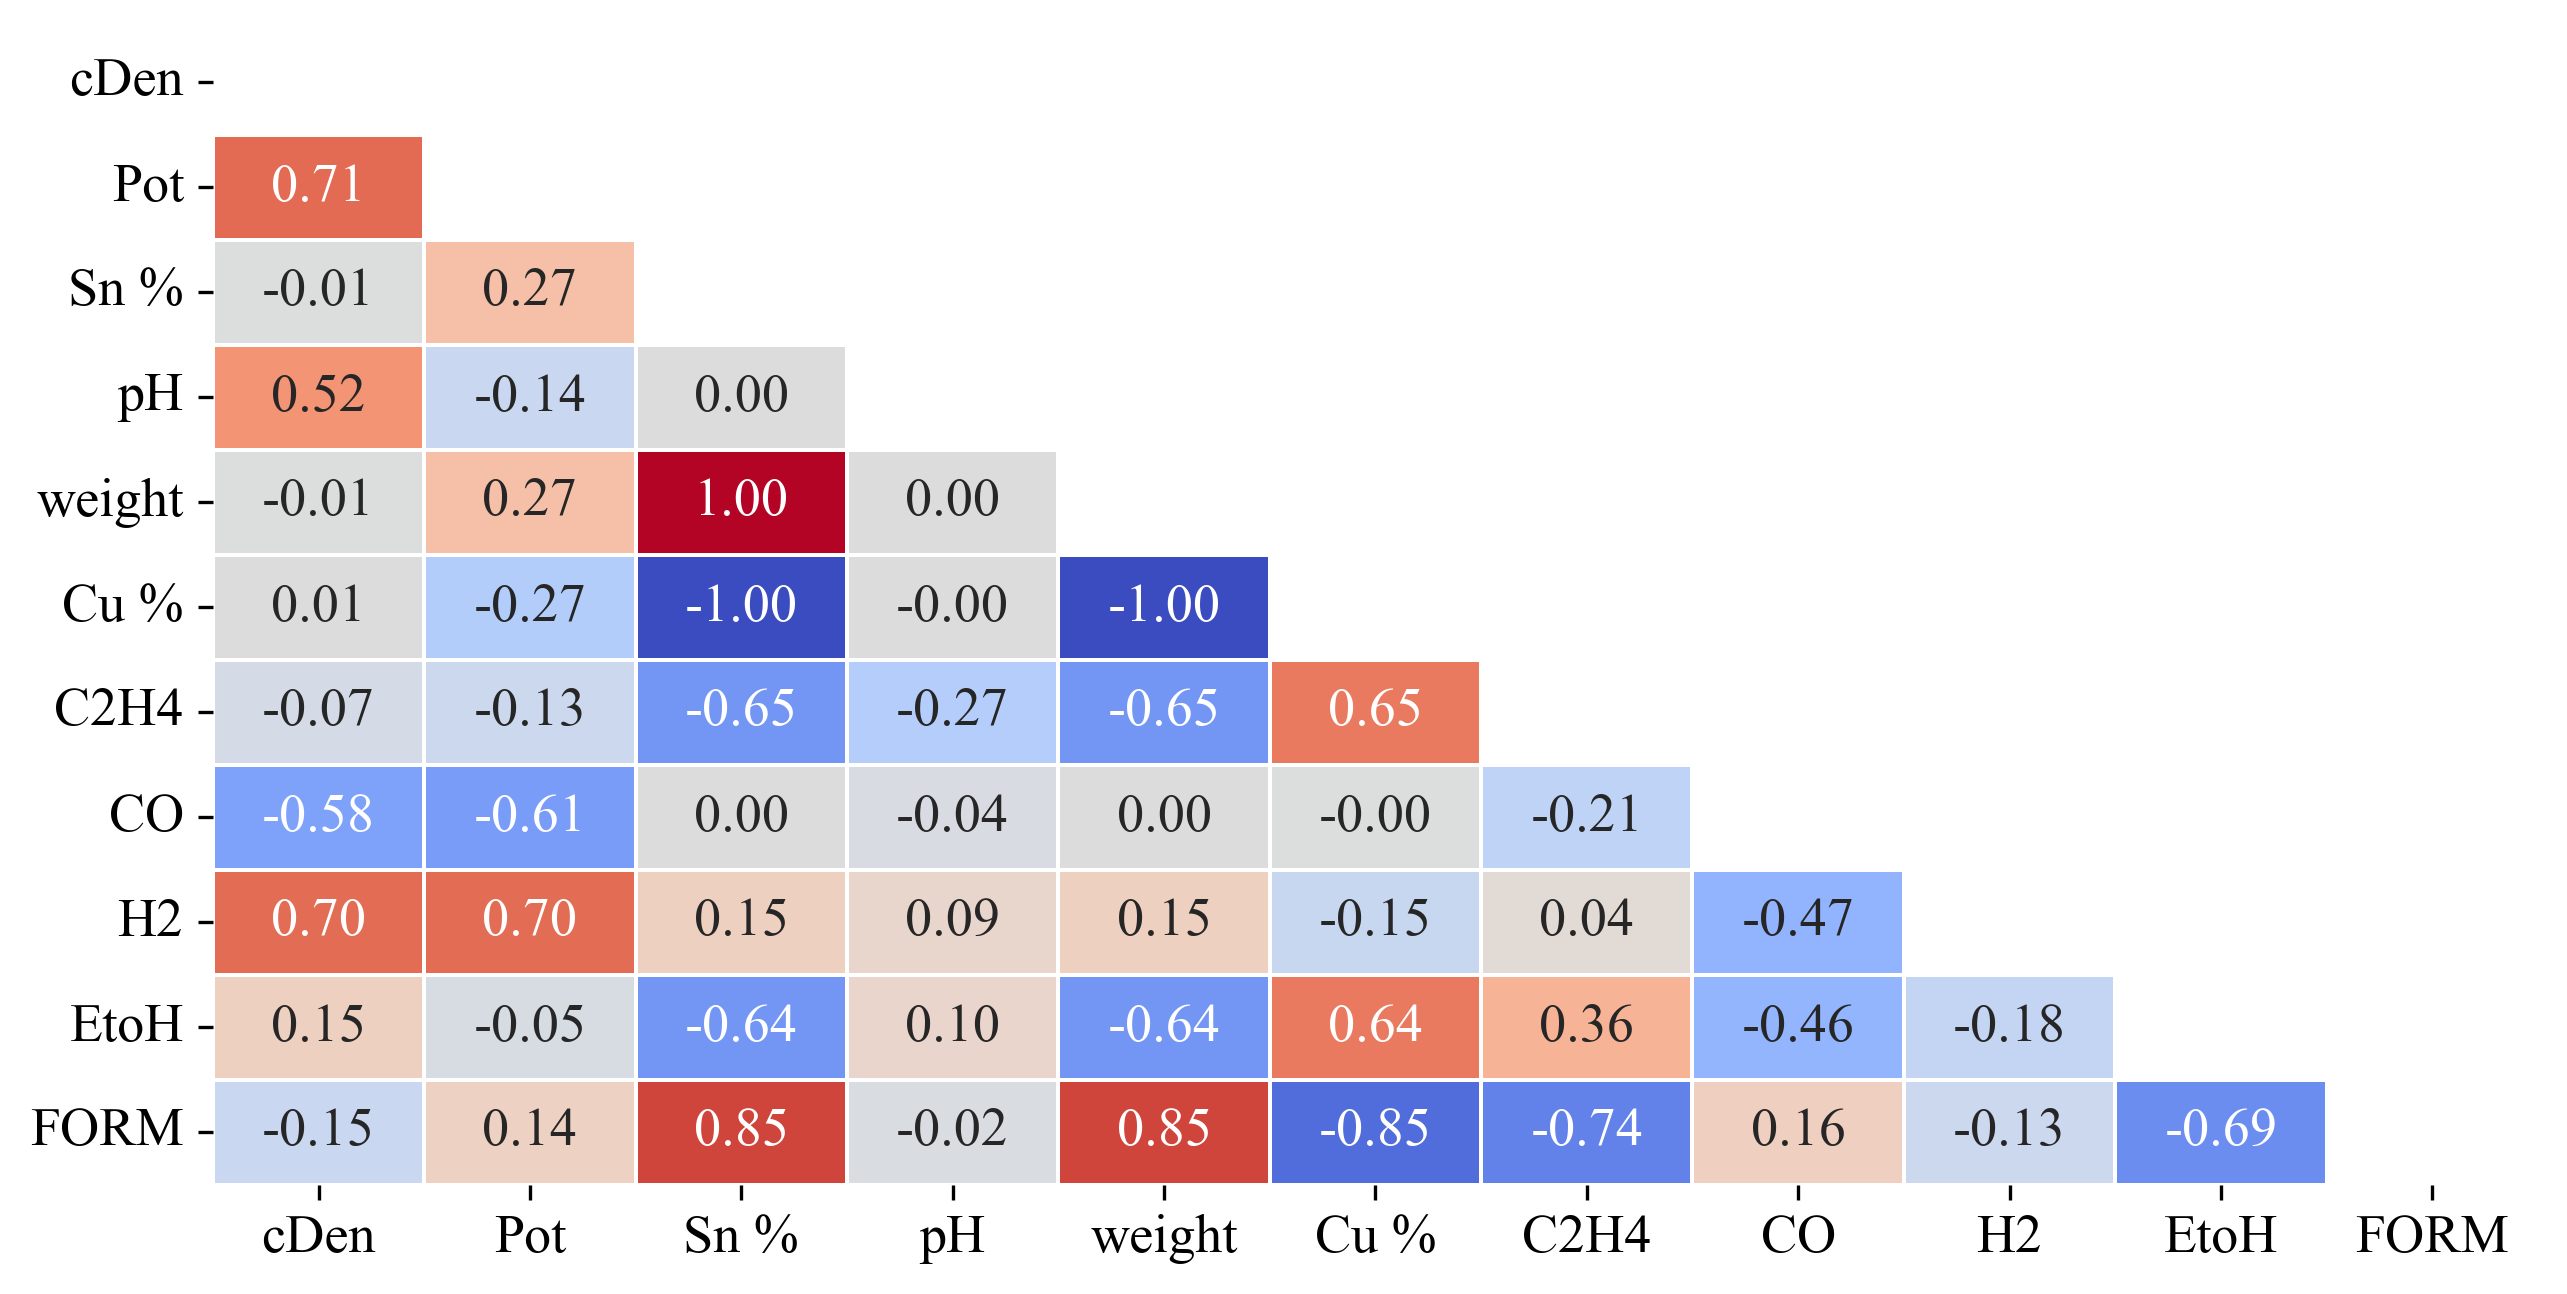

In [ ]:
plot_heat_map(data = data, fig_size = (10, 5), mask=True, save_fig=True, name='general_mask')

In [ ]:
ethane = {'cDen': -0.07, 'Pot': -0.13, 'Sn %': -0.65, 'pH': -0.27, 'Cu %': 0.65, 'weight': -0.65}
co = {'cDen': -0.58, 'Pot': -0.61, 'Sn %': 0.00, 'pH': -0.04, 'Cu %': -0.00, 'weight': 0.00}
hydrogen = {'cDen': 0.70, 'Pot': 0.70, 'Sn %': 0.15, 'pH': 0.09, 'Cu %': -0.15, 'weight': 0.15}
ethOH = {'cDen': 0.15, 'Pot': -0.05, 'Sn %': -0.64, 'pH': 0.10, 'Cu %': 0.64, 'weight': -0.64}
form = {'cDen': -0.15, 'Pot': 0.14, 'Sn %': 0.85, 'pH': -0.02, 'Cu %': -0.85, 'weight': 0.85}

heat = pd.DataFrame([ethane, co, hydrogen, ethOH, form])
heat.index = ['C2H4', 'CO', 'H2', 'EtOH', 'FORM']
heat


,cDen,Pot,Sn %,pH,Cu %,weight
C2H4,-0.07,-0.13,-0.65,-0.27,0.65,-0.65
CO,-0.58,-0.61,0.00,-0.04,-0.00,0.00
H2,0.70,0.70,0.15,0.09,-0.15,0.15
EtOH,0.15,-0.05,-0.64,0.10,0.64,-0.64
FORM,-0.15,0.14,0.85,-0.02,-0.85,0.85


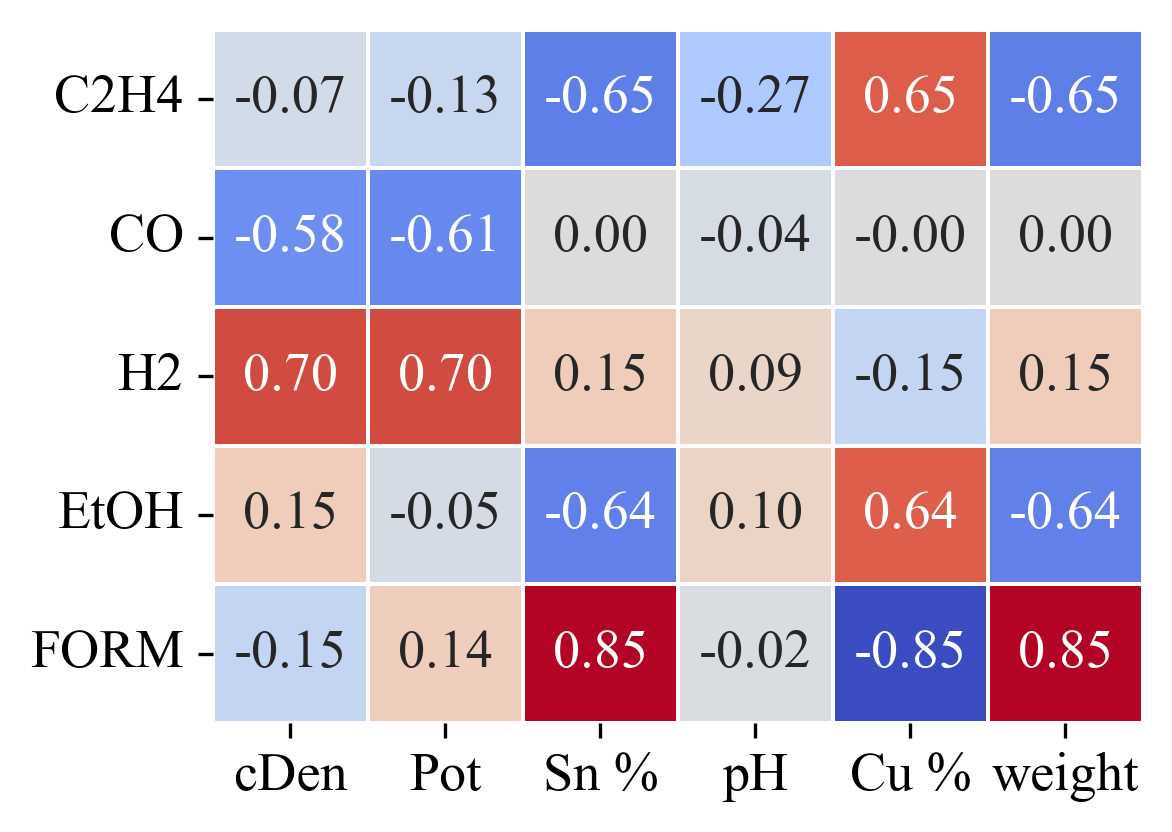

In [ ]:
plot_heat_map(data = heat, fig_size = (4, 3), mask=False, compute_corr=False, save_fig=True)

In [ ]:
len(features_col) + len(target_col)

11

In [ ]:
# fig, ax = plt.subplots(5, 4, figsize=(10, 7), dpi=200)

# for i, target in enumerate(target_col):
#     for j, feature in enumerate(features_col):
#         ax[i, j].scatter(data[feature], data[target], color='blue', alpha=0.7)
#         if i == len(target_col)-1:
#             ax[i, j].set_xlabel(feature)
#         if j == 0:
#             ax[i, j].set_ylabel(target)
#         # set min and max for x and y axis
#         diffX = data[feature].max() - data[feature].min()
#         diffY = data[target].max() - data[target].min()
#         pad = 0.1 # 10% padding
#         ax[i, j].set_xlim(data[feature].min() - pad * diffX, data[feature].max() + pad * diffX)
#         ax[i, j].set_ylim(data[target].min() - pad * diffY, data[target].max() + pad * diffY)


# plt.tight_layout()